# Credit defaulters identification using Logistic Regression

Introduction to the data set

German credit rating dataset contains categorical/symbolic attributes of the persons who availed the credit and the current status of the credit. The status of the credit is indicated by 1 for good credits and 2 for bad credits.

The dataset can be downloaded from UCI Repository.

https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

The detailed description of variables can be found at the same link.

## Objective of the study

1. Read the dataset
2. Create dummy variables for the categorical features
3. Specify X ( independent) and y (target/dependent) features
4. Split datasets into train and test datasets
5. Build a logistic regression model
6. Find significant variables
7. Create confusion matrix to find out Sensitivity and specificity
8. Draw ROC Plot
9. Find optimal cutoff probability using yoden's index
10. Find optimal cutoff probability using cost

### Read the data set

In [47]:
import pandas as pd
import numpy as np

In [48]:
data = pd.read_csv( "german.data", delim_whitespace = True, header = None )

In [49]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2


In [50]:
data.head(2).T ## T means transpose

,0,1
0,A11,A12
1,6,48
2,A34,A32
3,A43,A43
4,1169,5951
5,A65,A61
6,A75,A73
7,4,2
8,A93,A92
9,A101,A101


In [51]:
columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount', 'svaing_acc', 'present_emp_since', 
           'inst_rate', 'personal_status', 'other_debtors', 'residing_since', 'property', 'age','inst_plans', 'housing', 
           'num_credits', 'job', 'dependents', 'telephone', 'foreign_worker', 'status']

In [11]:
data.columns = columns

In [6]:
data.head(2)


,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2


In [7]:
data.head().T

,0,1,2,3,4
checkin_acc,A11,A12,A14,A11,A11
duration,6,48,12,42,24
credit_history,A34,A32,A34,A32,A33
purpose,A43,A43,A46,A42,A40
amount,1169,5951,2096,7882,4870
svaing_acc,A65,A61,A61,A61,A61
present_emp_since,A75,A73,A74,A74,A73
inst_rate,4,2,2,2,3
personal_status,A93,A92,A93,A93,A93
other_debtors,A101,A101,A101,A103,A101


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checkin_acc          1000 non-null object
duration             1000 non-null int64
credit_history       1000 non-null object
purpose              1000 non-null object
amount               1000 non-null int64
svaing_acc           1000 non-null object
present_emp_since    1000 non-null object
inst_rate            1000 non-null int64
personal_status      1000 non-null object
other_debtors        1000 non-null object
residing_since       1000 non-null int64
property             1000 non-null object
age                  1000 non-null int64
inst_plans           1000 non-null object
housing              1000 non-null object
num_credits          1000 non-null int64
job                  1000 non-null object
dependents           1000 non-null int64
telephone            1000 non-null object
foreign_worker       1000 non-null object
status               1000 non-null int64
dtypes: int64(8), ob

#### How many default and no default observations in the sample

In [14]:
data.status.value_counts()

1    700
2    300
Name: status, dtype: int64

There are about 300 defaults and 700 non-default observations

### Create dummy variables for the categorical features

In [15]:
data.columns

Index(['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
       'svaing_acc', 'present_emp_since', 'inst_rate', 'personal_status',
       'other_debtors', 'residing_since', 'property', 'age', 'inst_plans',
       'housing', 'num_credits', 'job', 'dependents', 'telephone',
       'foreign_worker', 'status'],
      dtype='object')

In [17]:
list(data.columns )

['checkin_acc',
 'duration',
 'credit_history',
 'purpose',
 'amount',
 'svaing_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'other_debtors',
 'residing_since',
 'property',
 'age',
 'inst_plans',
 'housing',
 'num_credits',
 'job',
 'dependents',
 'telephone',
 'foreign_worker',
 'status']

#### Remove the response variable from the dataset

In [19]:
X_features = list(data.columns )
X_features.remove( 'status' )
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'purpose',
 'amount',
 'svaing_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'other_debtors',
 'residing_since',
 'property',
 'age',
 'inst_plans',
 'housing',
 'num_credits',
 'job',
 'dependents',
 'telephone',
 'foreign_worker']

In [22]:
data_complete = pd.get_dummies(data[X_features], drop_first = True )

In [23]:
len(data_complete.columns )

48

In [25]:
data_complete.head().T

,0,1,2,3,4
duration,6,48,12,42,24
amount,1169,5951,2096,7882,4870
inst_rate,4,2,2,2,3
residing_since,4,2,3,4,4
age,67,22,49,45,53
num_credits,2,1,1,1,2
dependents,1,1,2,2,2
checkin_acc_A12,0,1,0,0,0
checkin_acc_A13,0,0,0,0,0
checkin_acc_A14,0,0,1,0,0


In [28]:
data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
duration                 1000 non-null int64
amount                   1000 non-null int64
inst_rate                1000 non-null int64
residing_since           1000 non-null int64
age                      1000 non-null int64
num_credits              1000 non-null int64
dependents               1000 non-null int64
checkin_acc_A12          1000 non-null uint8
checkin_acc_A13          1000 non-null uint8
checkin_acc_A14          1000 non-null uint8
credit_history_A31       1000 non-null uint8
credit_history_A32       1000 non-null uint8
credit_history_A33       1000 non-null uint8
credit_history_A34       1000 non-null uint8
purpose_A41              1000 non-null uint8
purpose_A410             1000 non-null uint8
purpose_A42              1000 non-null uint8
purpose_A43              1000 non-null uint8
purpose_A44              1000 non-null uint8
purpose_A45              1000 non-null 

#### Change the reponse variable to 0 = No Default and 1 = Default

In [26]:
y = data.status - 1 # Since upto now. 1,2 are stored as No default and Default.The output requires 1 to be subtracted. 

In [27]:
x = data_complete

### Specify X ( independent) and y (target/dependent) features

### Split datasets into train and test datasets

In [36]:
from sklearn.cross_validation import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3)

In [38]:
y_test[0:10]

926    0
602    1
526    0
646    0
892    0
241    0
4      1
695    0
614    1
618    1
Name: status, dtype: int64

### Build a logistic regression model

In [52]:
import statsmodels.api as sm

In [53]:
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

In [54]:
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.420156
         Iterations 7


In [55]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  700
Model:                          Logit   Df Residuals:                      651
Method:                           MLE   Df Model:                           48
Date:                Fri, 24 Aug 2018   Pseudo R-squ.:                  0.2992
Time:                        00:11:28   Log-Likelihood:                -294.11
converged:                       True   LL-Null:                       -419.70
                                        LLR p-value:                 2.551e-29
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.8098      1.342      0.603      0.546      -1.820       3.440
duration                  0.0349      0.011      3.086      0.002       0.013       0.057
amount                 9.721e-05   5.45e-05      1.783      0.075   -9.68e-06       0.000
inst_rate                 0.4017      0.109      3.695      0.000       0.189       0.615
residing_since           -0.0100      0.108     -0.093      0.926      -0.221       0.201
age                      -0.0313      0.012     -2.612      0.009      -0.055      -0.008
num_credits               0.4260      0.235      1.815      0.069      -0.034       0.886
dependents                0.6076      0.311      1.956      0.050      -0.001       1.217
checkin_acc_A12          -0.2049      0.275     -0.745      0.456      -0.744       0.334
checkin_acc_A13          -1.1321      0.476     -2.381      0.017      -2.064      -0.200
checkin_acc_A14          -1.7853      0.291     -6.134      0.000      -2.356      -1.215
credit_history_A31        0.2355      0.653      0.360      0.719      -1.045       1.516
credit_history_A32       -0.7303      0.519     -1.408      0.159      -1.747       0.286
credit_history_A33       -1.1204      0.588     -1.905      0.057      -2.273       0.032
credit_history_A34       -1.6080      0.530     -3.035      0.002      -2.646      -0.570
purpose_A41              -1.9288      0.487     -3.964      0.000      -2.882      -0.975
purpose_A410             -2.3885      0.984     -2.428      0.015      -4.317      -0.460
purpose_A42              -0.7119      0.327     -2.180      0.029      -1.352      -0.072
purpose_A43              -1.0976      0.311     -3.528      0.000      -1.707      -0.488
purpose_A44              -0.0038      0.847     -0.005      0.996      -1.664       1.656
purpose_A45              -1.5408      0.901     -1.711      0.087      -3.306       0.225
purpose_A46               0.0547      0.538      0.102      0.919      -0.999       1.109
purpose_A48              -2.2377      1.235     -1.813      0.070      -4.657       0.182
purpose_A49              -0.7900      0.409     -1.931      0.054      -1.592       0.012
svaing_acc_A62           -0.5705      0.368     -1.549      0.121      -1.293       0.152
svaing_acc_A63           -0.2112      0.475     -0.445      0.656      -1.141       0.719
svaing_acc_A64           -2.1603      0.801     -2.697      0.007      -3.730      -0.590
svaing_acc_A65           -1.1542      0.331     -3.489      0.000      -1.803      -0.506
present_emp_since_A72    -0.5474      0.547     -1.002      0.317      -1.619       0.524
present_emp_since_A73    -0.3983      0.521     -0.764      0.445      -1.420       0.623
present_emp_since_A74    -0.9140      0.561     -1.628      0.104      -2.014       0.186
present_emp_since_A75    -0.3406      0.528     -0.645      0.519      -1.376       0.695
personal_status_A92      -0.3468      0.468     -0.741      0.459      -1.264       0.570
p

## def userSquare(x):
    tempX = x*x
    return(tempX)

print (userSquare(2.5))

### Find significant variables

In [57]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [61]:
significant_vars = get_significant_vars( lg )

In [62]:
significant_vars

['duration',
 'amount',
 'inst_rate',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'purpose_A41',
 'purpose_A43',
 'svaing_acc_A64',
 'svaing_acc_A65',
 'inst_plans_A143']

### Predict Test Data and Measure Accuracy

In [85]:
from sklearn import metrics

In [86]:
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test,
                               "predicted_prob": model.predict( sm.add_constant( x_test ) ) } )
    return y_pred_df

In [87]:
y_pred_df = get_predictions( y_test, lg )

In [88]:
y_pred_df.head(2)

,actual,predicted_prob
926,0,0.687465
602,1,0.739348


#### Status_1 columns provides the predicted probability for the default classes

In [163]:
y_pred_df[0:10]

,actual,predicted_prob,predicted,predicted_new,predicted_final
926,0,0.687465,1,1,1
602,1,0.739348,1,1,1
526,0,0.163382,0,0,0
646,0,0.699043,1,1,1
892,0,0.415038,0,1,1
241,0,0.027034,0,0,0
4,1,0.848478,1,1,1
695,0,0.029006,0,0,0
614,1,0.070280,0,0,0
618,1,0.649222,1,1,1


In [116]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)

In [117]:
y_pred_df[0:10]

,actual,predicted_prob,predicted
926,0,0.687465,1
602,1,0.739348,1
526,0,0.163382,0
646,0,0.699043,1
892,0,0.415038,0
241,0,0.027034,0
4,1,0.848478,1
695,0,0.029006,0
614,1,0.070280,0
618,1,0.649222,1


### Create confusion matrix to find out Sensitivity and specificity

In [118]:
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline 

In [119]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [120]:
 metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted)

array([[180,  31],
       [ 41,  48]], dtype=int64)

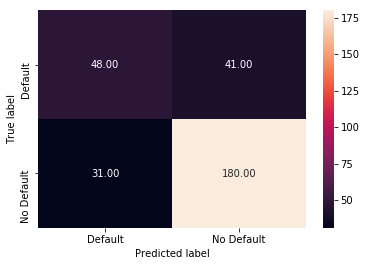

In [121]:

draw_cm( y_pred_df.actual, y_pred_df.predicted )

Note: the model could only predict very few default classes.

#### Overall accuracy of the model 

In [122]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

Total Accuracy :  0.76


In [123]:
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted ), 2 ) )

Precision :  0.61


In [124]:
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted ), 2 ) )

Recall :  0.54


In [125]:
cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )

In [126]:
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])

In [127]:
print('Sensitivity : ', round( sensitivity, 2) )

Sensitivity :  0.54


In [128]:
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

In [129]:
print('Specificity : ', round( specificity, 2 ) )

Specificity :  0.85


### Predicted Probability distribution Plots for Defaults and Non Defaults 

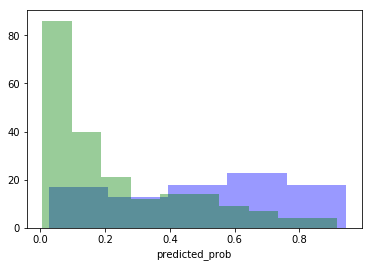

In [130]:
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde=False, color = 'b' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde=False, color = 'g' )

### Draw ROC Plot

In [131]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob  )
round( float( auc_score ), 2 )

0.79

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

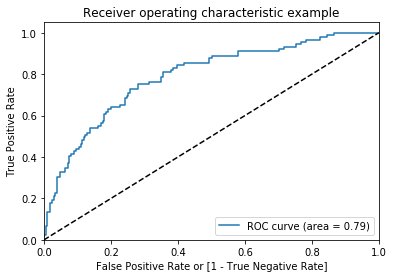

In [133]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob )

### Draw ROC Plot

In [134]:
thresholds[0:10]

array([ 0.94523454,  0.94160915,  0.91746706,  0.91502741,  0.91103023,
        0.89528722,  0.88811393,  0.87505005,  0.87146005,  0.86907536])

In [135]:
fpr[0:10]

array([ 0.        ,  0.        ,  0.00473934,  0.00473934,  0.00473934,
        0.00473934,  0.00473934,  0.00947867,  0.00947867,  0.00947867])

In [136]:
tpr[0:10]

array([ 0.01123596,  0.02247191,  0.02247191,  0.03370787,  0.04494382,
        0.05617978,  0.06741573,  0.06741573,  0.07865169,  0.08988764])

### Find optimal cutoff probability using yoden's index

1. Youden's index is where (Sensitivity+Specificity - 1) is maximum.

That is when (TPR+TNR -1) is maximum.

max( TPR - (1 - TNR) )

max( TPR - FPR )

In [141]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds } )

In [142]:
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr

In [143]:
tpr_fpr.sort_values( 'diff', ascending = False )[0:10]

,fpr,thresholds,tpr,diff
118,0.255924,0.346228,0.730337,0.474413
125,0.279621,0.294715,0.752809,0.473188
119,0.260664,0.343883,0.730337,0.469674
126,0.284360,0.294075,0.752809,0.468449
120,0.265403,0.331257,0.730337,0.464934
127,0.289100,0.287429,0.752809,0.463709
117,0.255924,0.347021,0.719101,0.463177
124,0.279621,0.314369,0.741573,0.461952
121,0.270142,0.330572,0.730337,0.460195
128,0.293839,0.287198,0.752809,0.458970


In [150]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.34 else 0) ##(the least treshold from above)

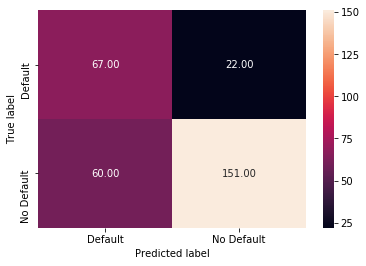

In [151]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_new )

### Find optimal cutoff probability using cost

In [152]:
cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted_new, [1,0] )

In [153]:
cm_mat = np.array( cm )

In [154]:
cm_mat[1, 0]

60

In [155]:
cm_mat[0, 1]

22

In [156]:
def get_total_cost( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    cm_mat = np.array( cm )
    return cm_mat[0,1] * 2 + cm_mat[0,1] * 1

In [157]:
get_total_cost( y_pred_df.actual, y_pred_df.predicted_new )

66

In [158]:
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

In [159]:
idx = 0
for each_prob in range( 20, 50):
    cost = get_total_cost( y_pred_df.actual,
                          y_pred_df.predicted_prob.map(
            lambda x: 1 if x > (each_prob/100)  else 0) )
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

In [160]:
cost_df.sort_values( 'cost', ascending = True )[0:5]

,prob,cost
0,0.20,45.0
1,0.21,51.0
2,0.22,51.0
3,0.23,51.0
4,0.24,57.0


In [161]:
y_pred_df['predicted_final'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.20 else 0)

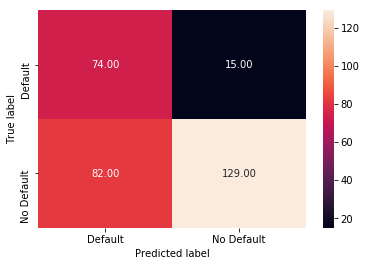

In [162]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_final )

Note: Predicting Defaults as No Defaults have been minimized

In [73]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted_final ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted_final ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted_final ), 2 ) )

cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted_final, [1,0] )

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.66
Precision :  0.46
Recall :  0.78
Sensitivity :  0.78
Specificity :  0.61


## Note: Total accuracy of the model is 67%, becuase the objective is not to improve total accuracy but minimize the quadrants that contribute to the cost.